In [9]:
import sys    
print('Running on Python version: {}'.format(sys.version))
!pip install hdbscan 

try:
    import lazyarray
    import lmfit
    import scipy
    import hdbscan

except:
    !pip install lazyarray
    !pip install hdbscan 
    !pip install scipy --upgrade
    !pip install numpy numba --upgrade 
    !pip install lmfit 
    
import lmfit
scipy.stats

Running on Python version: 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
  Using cached https://files.pythonhosted.org/packages/c2/34/99ced126b3f41a908d8883570a67fbf900f10eea3cfdd11e388eb8ae9aac/Cython-0.29.6-cp35-cp35m-manylinux1_x86_64.whl
cryptography 2.2.1 requires asn1crypto>=0.21.0, which is not installed.
cffi 1.11.5 requires pycparser, which is not installed.
allensdk 0.14.2 has requirement pandas<0.20.0,>=0.16.2, but you'll have pandas 0.23.1 which is incompatible.
  Found existing installation: Cython 0.23.5
Cannot uninstall 'Cython'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
cffi 1.11.5 requires pycparser, which is not installed.
cryptography 2.2.1 requires asn1crypto>

<module 'scipy.stats' from '/opt/conda/lib/python3.5/site-packages/scipy/stats/__init__.py'>

In [10]:
import os
import pickle

try:
    izhi_opt = pickle.load(open('protected/multi_objective_izhi.p','rb')) 
except:
    
    os.system('wget wget -O ncp_cell_layer_5_6.p https://osf.io/6yba2/download')
    os.system('wget -O multi_objective_izhi https://osf.io/3vp8d/download')
    izhi_opt = pickle.load(open('multi_objective_izhi.p','rb')) 





# Get Data
If content is not available locally, wget the files from the Open Science Frame Work.

In [11]:
from neuronunit.tests.druckmann2013 import *


In [12]:

dtc0 = list(izhi_opt.values())[0]['pf'][0].dtc
dtc1 = list(izhi_opt.values())[0]['pf'][1].dtc
dtc2 = list(izhi_opt.values())[0]['pf'][2].dtc
dtc_1 = list(izhi_opt.values())[0]['pf'][-1].dtc

print(list(izhi_opt.values())[0]['pf'][0].dtc.scores)
print(list(izhi_opt.values())[0]['pf'][-1].dtc.scores)
print(list(izhi_opt.values())[0]['pf'][2].dtc.scores)
print(list(izhi_opt.values())[0]['pf'][1].dtc.scores)
list(izhi_opt.values())[0]['pf'][0].dtc.attrs

print(dtc0.rheobase)
ir_currents = {}
ir_currents = dtc0.rheobase
standard = 1.5*ir_currents
standard*=1.5
strong = 3*ir_currents
print(standard)


{'RheobaseTest': 0.43475020334261383, 'InjectedCurrentAPAmplitudeTest': 1.0, 'InputResistanceTest': 0.5162167574928647, 'TimeConstantTest': 0.19463622334314878, 'InjectedCurrentAPWidthTest': 0.004511111383472155, 'RestingPotentialTest': 0.0010068761003825255, 'InjectedCurrentAPThresholdTest': 0.9999383647108253}
{'RheobaseTest': 0.27439091965608964, 'InjectedCurrentAPAmplitudeTest': 1.0, 'InputResistanceTest': 0.7583867186758638, 'TimeConstantTest': 0.9985452095287137, 'InjectedCurrentAPWidthTest': 0.8045887465032604, 'RestingPotentialTest': 0.9743806289694379, 'InjectedCurrentAPThresholdTest': 0.9957958143881491}
{'RheobaseTest': 0.34361838339745054, 'InjectedCurrentAPAmplitudeTest': 1.0, 'InputResistanceTest': 0.5587581971196718, 'TimeConstantTest': 0.07139840065746239, 'InjectedCurrentAPWidthTest': 0.16128647828914078, 'RestingPotentialTest': 0.046204212239741804, 'InjectedCurrentAPThresholdTest': 0.9999999998992437}
{'RheobaseTest': 0.3790062106554366, 'InjectedCurrentAPAmplitudeTe

In [13]:

tests = [AP12AmplitudeDropTest(standard), 
    AP1SSAmplitudeChangeTest(standard), 
    AP1AmplitudeTest(standard), 
    AP1WidthHalfHeightTest(standard), 
    AP1WidthPeakToTroughTest(standard), 
    AP1RateOfChangePeakToTroughTest(standard), 
    AP1AHPDepthTest(standard), 
    AP2AmplitudeTest(standard), 
    AP2WidthHalfHeightTest(standard), 
    AP2WidthPeakToTroughTest(standard), 
    AP2RateOfChangePeakToTroughTest(standard), 
    AP2AHPDepthTest(standard), 
    AP12AmplitudeChangePercentTest(standard), 
    AP12HalfWidthChangePercentTest(standard), 
    AP12RateOfChangePeakToTroughPercentChangeTest(standard), 
    AP12AHPDepthPercentChangeTest(standard), 
    AP1DelayMeanTest(standard), 
    AP1DelaySDTest(standard), 
    AP2DelayMeanTest(standard), 
    AP2DelaySDTest(standard), 
    Burst1ISIMeanTest(standard), 
    Burst1ISISDTest(standard), 
    InitialAccommodationMeanTest(standard), 
    SSAccommodationMeanTest(standard), 
    AccommodationRateToSSTest(standard), 
    AccommodationAtSSMeanTest(standard), 
    AccommodationRateMeanAtSSTest(standard), 
    ISICVTest(standard), 
    ISIMedianTest(standard), 
    ISIBurstMeanChangeTest(standard), 
    SpikeRateStrongStimTest(strong), 
    AP1DelayMeanStrongStimTest(strong), 
    AP1DelaySDStrongStimTest(strong), 
    AP2DelayMeanStrongStimTest(strong), 
    AP2DelaySDStrongStimTest(strong), 
    Burst1ISISDStrongStimTest(strong),
    Burst1ISIMeanStrongStimTest(strong)]

AHP_list = [AP1AHPDepthTest(standard), 
    AP2AHPDepthTest(standard), 
    AP12AHPDepthPercentChangeTest(standard) ] 


In [14]:
dtc0.vtest

{0: {'injected_square_current': {'amplitude': array(28.38592529296875) * pA,
   'delay': array(100.0) * ms,
   'duration': array(1000.0) * ms}},
 1: {'injected_square_current': {'amplitude': array(-10.0) * pA,
   'delay': array(200.0) * ms,
   'duration': array(500.0) * ms}},
 2: {'injected_square_current': {'amplitude': array(-10.0) * pA,
   'delay': array(200.0) * ms,
   'duration': array(500.0) * ms}},
 3: {'injected_square_current': {'amplitude': array(-10.0) * pA,
   'delay': array(200.0) * ms,
   'duration': array(500.0) * ms}},
 4: {'injected_square_current': {'amplitude': array(28.38592529296875) * pA,
   'delay': array(100.0) * ms,
   'duration': array(1000.0) * ms}},
 5: {'injected_square_current': {'amplitude': array(28.38592529296875) * pA,
   'delay': array(100.0) * ms,
   'duration': array(1000.0) * ms}},
 6: {'injected_square_current': {'amplitude': array(28.38592529296875) * pA,
   'delay': array(100.0) * ms,
   'duration': array(1000.0) * ms}}}

{'RheobaseTest': 0.3790062106554366, 'InjectedCurrentAPAmplitudeTest': 1.0, 'InputResistanceTest': 0.5408201556655916, 'TimeConstantTest': 0.07844538201231388, 'InjectedCurrentAPWidthTest': 0.04959051887629906, 'RestingPotentialTest': 0.1084234062376297, 'InjectedCurrentAPThresholdTest': 0.9999999999994738}
28.38592529296875 pA
85.15777587890625 pA


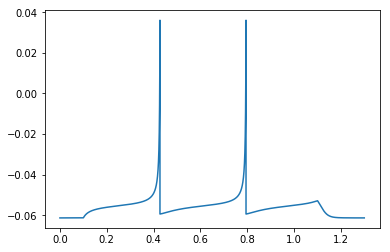

[  7.28245272e-05] V
[  4.54515429e-05] mV
[ 0.0560128] V
0.8500000000000001 ms
[ 0.] ms
-3816.7083822004943 V/s
[ 0.03940491] V
[ 0.05593998] V
0.8500000000000001 ms
[ 0.] ms
-3816.7083822004943 V/s
[ 0.03947773] V
[-0.13001407] dimensionless
0.0 dimensionless
-0.0 dimensionless
[ 0.18481081] dimensionless
52.850000000000136 ms
0.0 ms
111.75 ms
0.0 ms
59.67499999999984 ms
0.0 ms
0.0
16.666666666666664
0.14914243102162564 1/ms
-2.96633408668
30.482752645093903 ms
192.693714278
60.69999999999993 ms
2.63157894737
22.5 Hz
38.875 ms
0.0 ms
81.54999999999995 ms
0.0 ms
0.0 ms
43.33749999999998 ms


In [15]:
from neuronunit.optimisation.optimisation_management import mint_generic_model, inject_and_plot

import quantities as pq
print(list(izhi_opt.values())[0]['pf'][1].dtc.scores)
list(izhi_opt.values())[0]['pf'][0].dtc.attrs

print(dtc0.rheobase)
ir_currents = {}
ir_currents = dtc0.rheobase
standard = 1.5*ir_currents
standard*=1.5
strong = 3*ir_currents
print(strong)
np.isin = np.in1d

inject_and_plot(dtc0,figname='problem')
current_amplitude = {'mean': ir_currents, 'n': 1, 'std': 0.0 * pq.pA}
test = AP12AmplitudeChangePercentTest(current_amplitude)


model = mint_generic_model(dtc0.backend)
model.set_attrs(dtc0.attrs)
model
    
for i, test in enumerate(tests):
    mean = test.generate_prediction(model)['mean']
    print(mean)
    


In [16]:

from pandas import DataFrame
import numpy as np
import pandas
from matplotlib import pyplot as plt

import string 
from scipy.stats import pearsonr
#import statsmodels.formula.api as smf


from scipy.linalg import toeplitz
from scipy import stats
from scipy import optimize

import hdbscan
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 20)
from manager import ModelManager
mgr = ModelManager()
mgr.server.connect()

ImportError: No module named 'hdbscan'

In [ ]:
protocol_cost = {
    'Steady State':       1, # 1s
    'Standard':         5*2, # 5 repetitions of 1s SS 1s stim
    'Strong':           5*2, # 5 repetitions of 1s SS 1s strong stim
    'Input Resistance': 2*2, # 2 levels of 1s SS 1s stim
}

prop_protocol = {
    'AP1Amplitude': 'Standard',
    'AP2Amplitude': 'Standard',
    'AP12AmplitudeDrop': 'Standard',
    'AP12AmplitudeChangePercent': 'Standard',
    'AP1SSAmplitudeChange': 'Standard'  ,
    
    'AP1WidthHalfHeight': 'Standard',
    'AP2WidthHalfHeight': 'Standard',
    'AP12HalfWidthChangePercent': 'Standard',
    
    'AP1WidthPeakToTrough': 'Standard',
    'AP2WidthPeakToTrough': 'Standard',
    
    'AP1RateOfChangePeakToTrough': 'Standard',
    'AP2RateOfChangePeakToTrough': 'Standard', 
    'AP12RateOfChangePeakToTroughPercentChange': 'Standard',
    
    'AP1AHPDepth': 'Standard',
    'AP2AHPDepth': 'Standard',
    'AP12AHPDepthPercentChange': 'Standard',
    
    'AP1DelayMean': 'Standard',
    'AP2DelayMean': 'Standard',
    
    'AP1DelaySD': 'Standard',
    'AP2DelaySD': 'Standard',
    
    'AP1DelayMeanStrongStim': 'Strong',
    'AP2DelayMeanStrongStim': 'Strong',
    
    'AP1DelaySDStrongStim': 'Strong',
    'AP2DelaySDStrongStim': 'Strong',
    
    'Burst1ISIMean': 'Standard',
    'Burst1ISIMeanStrongStim': 'Strong',
    
    'Burst1ISISD': 'Standard',
    'Burst1ISISDStrongStim': 'Strong',
    
    'InitialAccommodationMean': 'Standard',
    'SSAccommodationMean': 'Standard',
    'AccommodationRateToSS': 'Standard',
    'AccommodationAtSSMean': 'Standard',
    'AccommodationRateMeanAtSS': 'Standard',
    
    
    'ISIMedian': 'Standard',
    'ISICV': 'Standard',
    'ISIBurstMeanChange': 'Standard',
    
    'SpikeRateStrongStim': 'Strong',
    
    'InputResistance': 'Input Resistance',
    
    'SteadyStateAPs': 'Steady State',
}

prop_names = [
    'AP1Amplitude',
    'AP2Amplitude',
    'AP12AmplitudeDrop',
    'AP12AmplitudeChangePercent',
    'AP1SSAmplitudeChange',  
    
    'AP1WidthHalfHeight',
    'AP2WidthHalfHeight',
    'AP12HalfWidthChangePercent',
    
    'AP1WidthPeakToTrough',
    'AP2WidthPeakToTrough',
    
    'AP1RateOfChangePeakToTrough',
    'AP2RateOfChangePeakToTrough',    
    'AP12RateOfChangePeakToTroughPercentChange',
    
    'AP1AHPDepth',
    'AP2AHPDepth',
    'AP12AHPDepthPercentChange',
    
    'AP1DelayMean',
    'AP2DelayMean',
    
    'AP1DelaySD',
    'AP2DelaySD',
    
    'AP1DelayMeanStrongStim',
    'AP2DelayMeanStrongStim',
    
    'AP1DelaySDStrongStim',
    'AP2DelaySDStrongStim',
    
    'Burst1ISIMean',
    'Burst1ISIMeanStrongStim',
    
    'Burst1ISISD',
    'Burst1ISISDStrongStim',
    
    'InitialAccommodationMean',
    'SSAccommodationMean',
    'AccommodationRateToSS',
    'AccommodationAtSSMean',
    'AccommodationRateMeanAtSS',
    
    
    'ISIMedian',
    'ISICV',
    'ISIBurstMeanChange',
    
    'SpikeRateStrongStim',
    
    'InputResistance',
    
    'SteadyStateAPs',
    
    'FrequencyPassAbove',
    'FrequencyPassBelow',
    
    'RampFirstSpike',
]